# Data Warehouse und Datenmodellierung

## Inhaltsverzeichnis
- [Definition und Eigenschaften](#Definition-und-Eigenschaften)
- [Ergebnisdarstellung](#Ergebnisdarstellung)
- [Beispiel](#Beispiel)

## Definition und Eigenschaften
Das Data Warehouse ist ein zentrales Lager für Daten, das zu Analysezwecken eingesetzt wird. Im Data Warehouse werden Daten aus verschiedenen Quellen, unternehmensintern wie -extern und aus unterschiedlichen Formaten, gesammelt und aufbereitet.

Nach William Inmon, 1996 wird der Begriff des Data Warehouse durch vier Eigenschaften charakterisiert:
1. **Subjektorientiert:** Daten aus verschiedenen Bereichen und zu verschiedenen Themen werden analysiert. Die Daten werden zentralisiert bereitgestellt.
1. **Integriert:** Das Data Warehouse stellt die Konsistenz verschiedener Daten aus unterschiedlichen Quellen sicher.
1. **Permanent:** Sobald die Daten gespeichert wurden, sind sie stabil und werden in der Regel weder entfernt noch verändert.
1. **Zeitabhängig:** Daten werden über einen längeren Zeitraum erfasst. Bei der Analyse sind damit zeitabhängige Entwicklungen beobachtbar.

Die Arbeit mit einem Data Warehouse gliedert sich dabei ebenfalls in unterschiedliche Bereiche:
1. **Beschaffung:** Daten müssen aus den einzubeziehenden Quellsystemen beschafft und extrahiert werden.
1. **Bereinigung:** Daten werden transformiert und im Data Warehouse abgelegt.
1. **Versorgung:** Daten werden in ein sogenanntes *Data Mart* gespeichert. Sie beschreiben Auszüge oder Teildatensätze, die auf die Anforderungen der nachfolgenden Verarbeitung zugeschnitten sind.
1. **Analyse:** Auf Basis der Data Marts werden Analysen durchgeführt.

![Data Warehouse]( 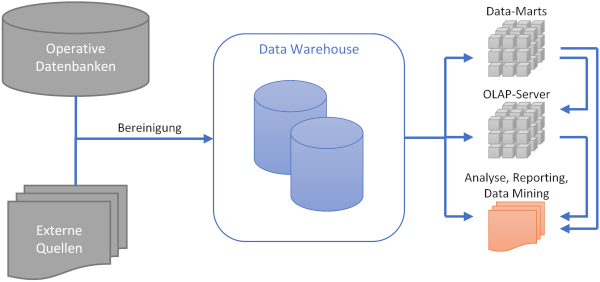)

## Ergebnisdarstellung
**Fakten** sind Kennzahlen, die für ein Unternehmen von Interesse sind. Dazu können also Gewinn und Umsatz, in detaillierterer Betrachtung aber auch die Anzahl der Nutzer oder die Menge der Interaktionen zählen.

**Dimensionen** dienen als eine Kategorierisung der Fakten. Zu diesen zählt beispielsweise ein Zeitpunkt, der Standort einer Filiale oder die Gruppenzugehörigkeit in einem Split-Test. Dimensionen ermöglichen daher Filtern und Gruppierung.

Das Ergebnis der Verknüpfung aus Dimensionen und Fakten lässt sich als Würfel oder Quader visualisieren. Im Folgenden soll dies am Datensatz [Disney+ Movies and TV Shows](https://www.kaggle.com/code/werador/disney-data-analysis/data) mit zusätzlichen Attributen demonstriert werden. Die wichtigste Kennzahl soll dabei die Zuschauerwertung sein. Als Dimensionen stehen unter anderem das Veröffentlichungsjahr, das Budget und die Laufzeit zur Verfügung.

![Ergebniswürfel]( 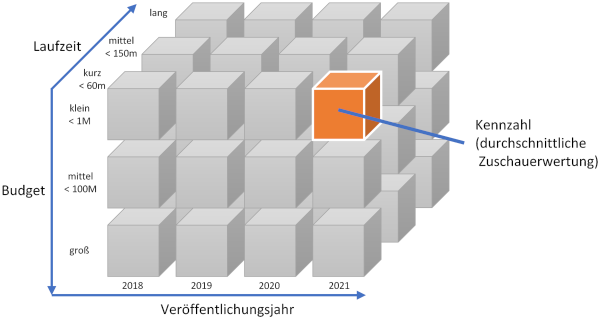)

## Beispiel
Zunächst muss Pandas importiert und der Datensatz geladen werden.

In [ ]:
import pandas as pd

df = pd.read_csv('disney_plus_titles.csv')
df.head(5)

Mit der Methode `describe` können Sie sich einen ersten Einblick über numerische Werte verschaffen.

In [ ]:
df.describe()

Die minimalen Werte lassen darauf schließen, dass der Datensatz nicht bereinigt wurde.
- Ein Film mit einem Budget (`budget`) von $0$ kann nicht produziert werden.
- Ist die Anzahl der abgegebenen Zuschauerstimmen (`vote_count`) $0$, dann ist der Wert der Zuschauerwertung (`vote_average`) immer $0$, jedoch nicht aussagekräftig.
- Ein Film mit einer Laufzeit von $0$ Minuten existiert nicht.

Zuerst sollen nun die entsprechenden Zeilen entfernt werden, um spätere Durchschnittswerte nicht zu verfälschen.

In [ ]:
df_filtered = df[(df['budget'] > 0) & (df['vote_count'] > 0) & (df['runtime'] > 0)]
df_filtered.head(5)

Um die entsprechenden Teilwürfel zu formen, werden die Werte `budget` und `runtime` diskretisiert. Im Ergebniswürfel sind bereits Vorschläge zur Aufteilung enthalten, die mit der Funktion `cut` durchgeführt werden.

In [ ]:
df_discrete = df_filtered.copy()

df_discrete['budget'] = pd.cut(df_discrete['budget'],
                               (0, 1_000_000, 100_000_000, df_discrete['budget'].max()),
                               labels=('klein', 'mittel', 'groß'))
df_discrete['runtime'] = pd.cut(df_discrete['runtime'],
                                (0, 60, 150, df_discrete['runtime'].max()),
                                labels=('kurz', 'mittel', 'lang'))

Zuletzt wird nach den entsprechenden Dimensionen gruppiert und der Durchschnitt über alle Nutzerwertungen berechnet.

In [ ]:
result = df_discrete.groupby(['release_year', 'runtime', 'budget'])['vote_average'].mean()
result

Als Ausgabe sehen Sie den Ergebniswürfel in Tabellenform. Dies ist jedoch kein DataFrame, sondern eine Series. Falls für eine Kombination der Dimensionen nicht genügend Werte vorhanden sind, wird NaN eingesetzt. Unsere hervorgehobene Kennzahl aus dem Ergebniswürfel lässt sich nun wie folgt auslesen.

In [ ]:
result[2021]['kurz']['klein']

**Verständnisfragen:**
- Welche Skala wird für die Nutzerwertung verwendet?
- Ist $7.5$ eine überdurchschnittlich gute Wertung?

Beide Fragen lassen sich anhand der Zwischenergebnisse beantworten.